In [1]:
from load_model_and_data import loader, known_skew
from bootstrapper import data_iterator, data_iterator_2d
import numpy as np
from os.path import join
import itertools
import pandas as pd
from plotter import pretty_plot
import matplotlib.pyplot as plt

In [2]:
lead_time = 'first_hour'
target = 'tornado'
n_bootstrap=10

cmap = {'tornado' : 'Reds', 
        'severe_hail' : 'Greens',
        'severe_wind' : 'Blues',
       }

(predictions, 
     X, y, 
     init_times, 
     test_dates,
    fti) = loader(lead_time, target)

forecast_time_indices=fti

/home/monte.flora/miniconda3/envs/wofs_test/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SimpleImputer from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/monte.flora/miniconda3/envs/wofs_test/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/monte.flora/miniconda3/envs/wofs_test/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from vers

In [5]:
list(X.columns)

['srh_0to1_ens_mean_spatial_mean',
 'srh_0to3_ens_mean_spatial_mean',
 'cape_ml_ens_mean_spatial_mean',
 'cin_ml_ens_mean_spatial_mean',
 'shear_u_0to6_ens_mean_spatial_mean',
 'shear_v_0to6_ens_mean_spatial_mean',
 'shear_u_0to1_ens_mean_spatial_mean',
 'shear_v_0to1_ens_mean_spatial_mean',
 'lcl_ml_ens_mean_spatial_mean',
 'th_e_ml_ens_mean_spatial_mean',
 'u_10_ens_mean_spatial_mean',
 'v_10_ens_mean_spatial_mean',
 'mid_level_lapse_rate_ens_mean_spatial_mean',
 'low_level_lapse_rate_ens_mean_spatial_mean',
 'temperature_850mb_ens_mean_spatial_mean',
 'temperature_700mb_ens_mean_spatial_mean',
 'temperature_500mb_ens_mean_spatial_mean',
 'geopotential_height_850mb_ens_mean_spatial_mean',
 'geopotential_height_700mb_ens_mean_spatial_mean',
 'geopotential_height_500mb_ens_mean_spatial_mean',
 'dewpoint_850mb_ens_mean_spatial_mean',
 'dewpoint_700mb_ens_mean_spatial_mean',
 'dewpoint_500mb_ens_mean_spatial_mean',
 'uh_0to2_time_max_ens_mean_spatial_mean',
 'uh_2to5_time_max_ens_mean_sp

In [3]:
x = np.sqrt(X['shear_u_0to6_ens_mean_spatial_mean']**2 + X['shear_v_0to6_ens_mean_spatial_mean']**2)
x 

iterator = [0, 20, 40]


X['Run Date'] = test_dates
# Stratify by initialization times 
datasets = data_iterator(to_be_stratified=x, 
                         iterator=iterator,
                         predictions=predictions,
                         X=X,
                         y=y,
                             known_skew=known_skew[lead_time][target],
                             n_bootstrap=n_bootstrap,
                             forecast_time_indices=fti,
                         binning=True
                            )


Text(0.5, 0.98, 'TORNADO FIRST HOUR')

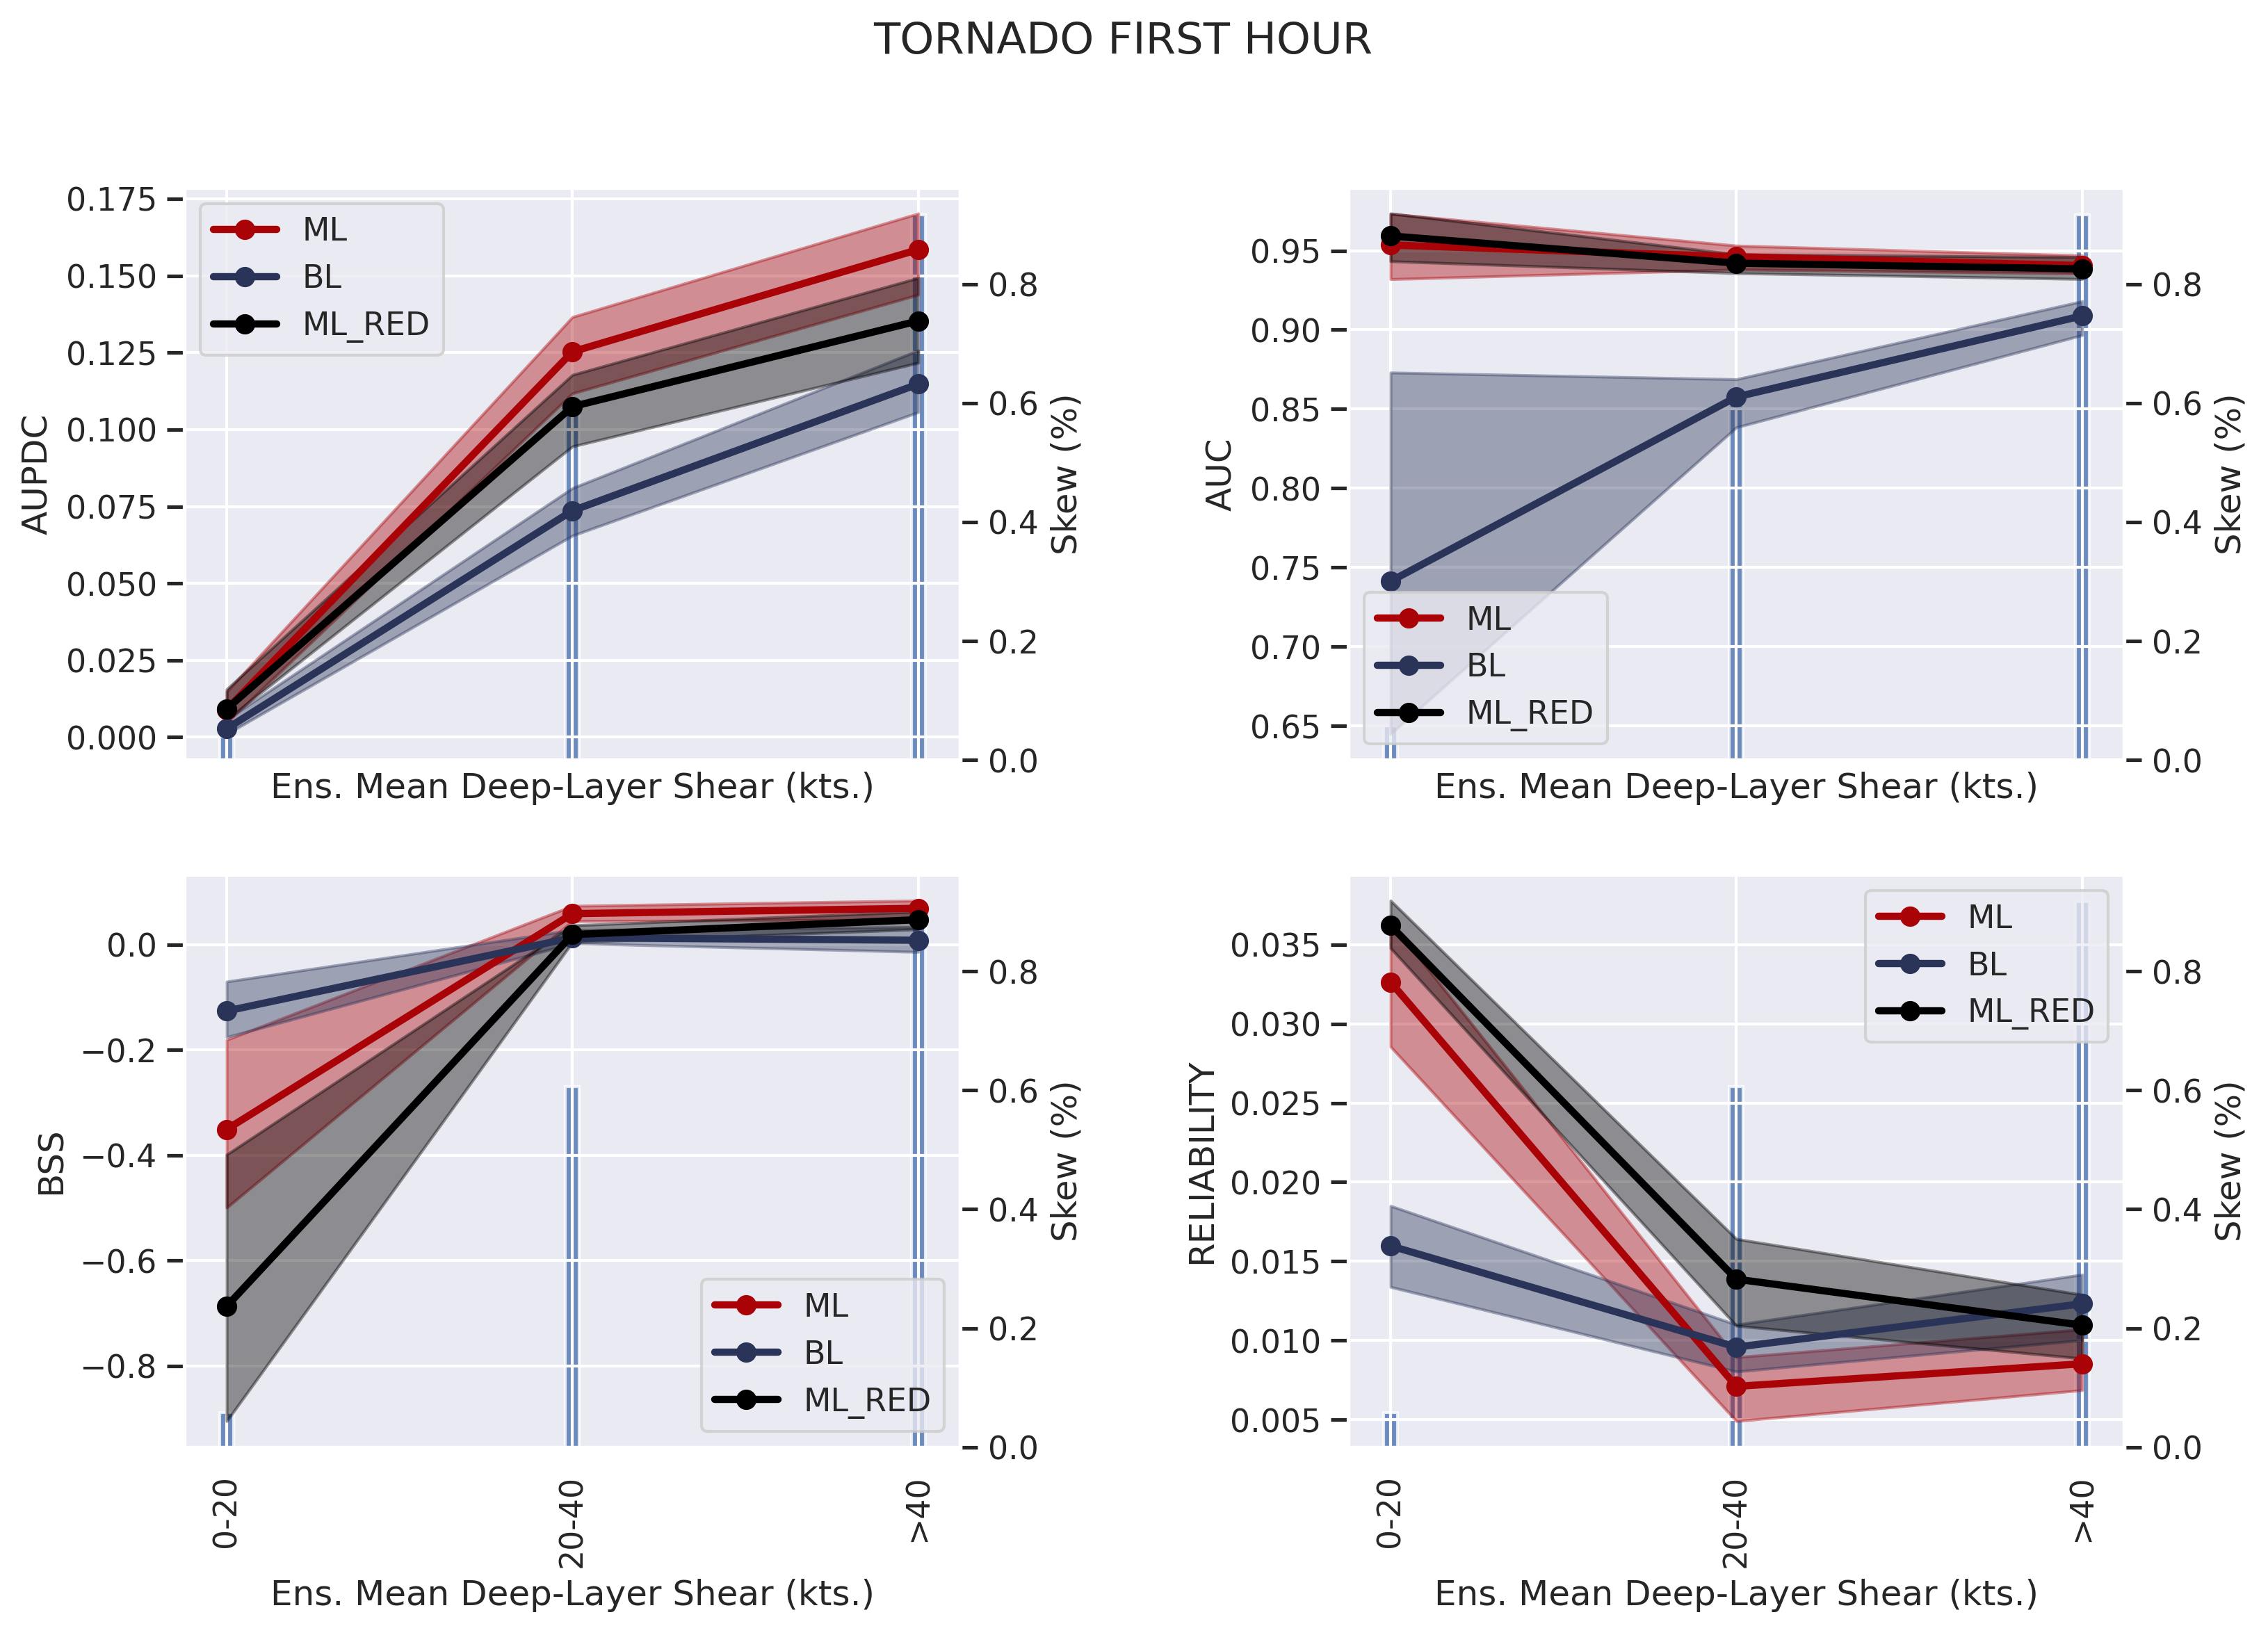

In [4]:
def get_tick_labels(rng):
    return [f'{rng[i]}-{rng[i+1]}' for i in range(len(rng)-1)] + [f'>{rng[-1]}']


f,axes=plt.subplots(ncols=2, nrows=2, dpi=300, figsize=(12,8), sharex=True)
metrics = ['aupdc', 'auc', 'bss', 'reliability']

for ax, metric in zip(axes.flat, metrics):
    data = {'ML' : datasets[0][metric], 'BL' : datasets[-1][metric], 'ML_RED' : datasets[1][metric]}
    
    pretty_plot(ax, iterator, data, 
                histdata=np.mean(datasets[0]['Skew'].values, axis=1)*100, 
                xlabel='Ens. Mean Deep-Layer Shear (kts.)', 
                ylabel=metric.upper(), 
                right_ylabel = 'Skew (%)',
                model_name='')
    
    ax.set_xticks(iterator)
    ax.set_xticklabels(get_tick_labels(iterator))
    
plt.subplots_adjust(wspace=0.5, hspace=0.2)
plt.suptitle(f"{target.replace('_', ' ').upper()} {lead_time.replace('_', ' ').upper()}", fontsize=15)